In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("city_day.csv")

In [3]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [7]:
df.drop_duplicates()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [8]:
dist=(df['City'])
distset=set(dist)
dd=list(distset) 
dictofwords = { dd[i]: i for i in range(0, len(dd)) } 
df['City']=df['City'].map(dictofwords)

dist=(df['AQI_Bucket'])
distset=set(dist)
dd=list(distset) 
dictofwords = { dd[i]: i for i in range(0, len(dd)) } 
df['AQI_Bucket']=df['AQI_Bucket'].map(dictofwords)

df.fillna(df['PM2.5'].mean(),inplace = True)
df.fillna(df['PM10'].mean(),inplace = True)
df.fillna(df['NO'].mean(),inplace = True)
df.fillna(df['NO2'].mean(),inplace = True)
df.fillna(df['NOx'].mean(),inplace = True)
df.fillna(df['NH3'].mean(),inplace = True)
df.fillna(df['CO'].mean(),inplace = True)
df.fillna(df['SO2'].mean(),inplace = True)
df.fillna(df['O3'].mean(),inplace = True)
df.fillna(df['Benzene'].mean(),inplace = True)
df.fillna(df['Toluene'].mean(),inplace = True)
df.fillna(df['AQI'].mean(),inplace = True)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

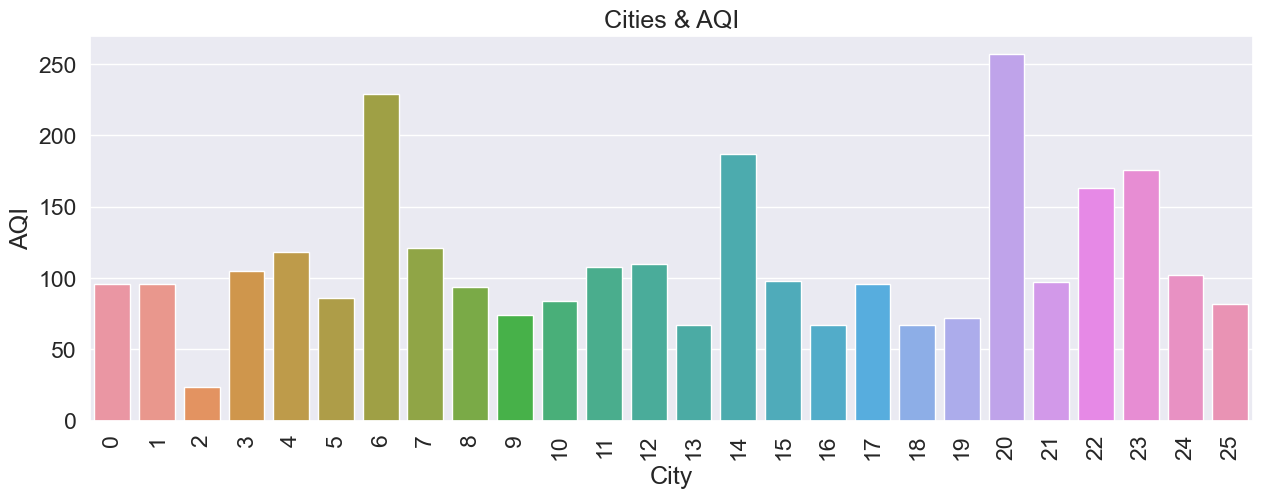

In [10]:
city_wise_AQI = df[['City','AQI']].groupby(['City']).median().sort_values(['AQI']).reset_index()
plt.figure(figsize=(15,5))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=city_wise_AQI).set(title ='Cities & AQI')
plt.xticks(rotation=90)
plt.show()

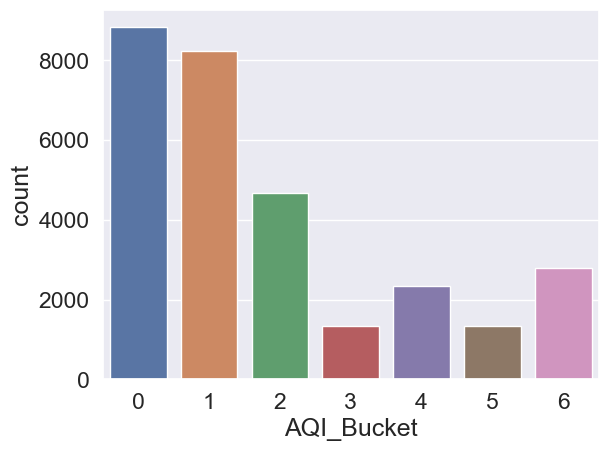

In [11]:
sns.countplot(x=df["AQI_Bucket"]);

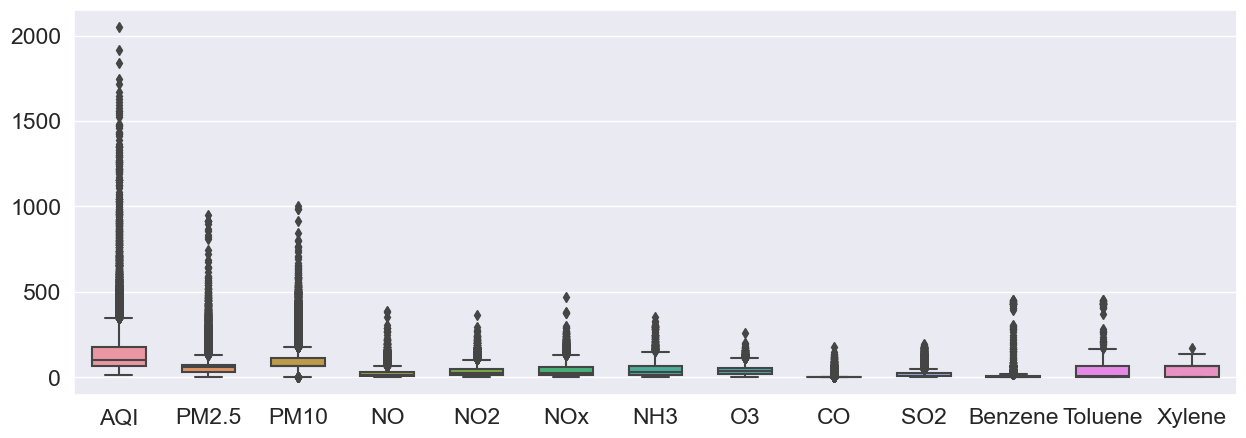

In [12]:
plt.figure(figsize=(15, 5))  
# Set the float columns for boxplot. These are the data fields that need for ML.
sns.boxplot(data=df[[ 'AQI','PM2.5', 'PM10','NO', 'NO2', 'NOx','NH3','O3', 'CO', 'SO2','Benzene', 'Toluene', 'Xylene']],width=0.6)
# Display
plt.show()

In [13]:
# This  takes a DataFrame as a parameter and identifies outliers for numeric columns in the DataFrame. 
# It replaces these outliers with the corresponding quartile values (Q1 and Q3). 
# Outliers are identified using the interquartile range (IQR).
# create a function for regression and clasification data sets

def replace_outliers_with_quartiles(df):
    for column in df.select_dtypes(include=['number']).columns: # Used to cycle through all numeric columns in the DataFrame.
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # To identify outliers, lower and upper limits are calculated and values outside these limits are considered outliers.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # For each column, Erroneous values identified and replace them with Q1 or Q3 by using a lambda function. 
        # If the value is less than the lower band, it is replaced with Q1. 
        # If it is greater than the upper band, it is replaced with Q3. 
        # If the data not lower or upper band , the value is not changed and remains the same.
        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    return df
# regression data set
# for WEKA, the data set must be set to df_city_day_full to add the AQI
df = replace_outliers_with_quartiles(df)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,6,2015-01-01,67.450578,67.450578,0.92,18.22,17.15,67.450578,0.92,27.64,57.12,0.00,0.020000,0.000000,67.450578,2
1,6,2015-01-02,67.450578,67.450578,0.97,15.69,16.46,67.450578,0.97,24.55,34.06,3.68,5.500000,3.770000,67.450578,2
2,6,2015-01-03,67.450578,67.450578,17.40,19.30,29.70,67.450578,1.71,29.07,30.70,6.80,16.400000,2.250000,67.450578,2
3,6,2015-01-04,67.450578,67.450578,1.70,18.48,17.97,67.450578,1.70,18.59,36.08,4.43,10.140000,1.000000,67.450578,2
4,6,2015-01-05,67.450578,67.450578,22.10,21.42,37.76,67.450578,1.71,39.33,39.31,7.01,18.890000,2.780000,67.450578,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,17,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24,12.070000,0.730000,41.000000,5
29527,17,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74,2.210000,0.380000,70.000000,1
29528,17,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01,0.010000,0.000000,68.000000,1
29529,17,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00,0.000000,0.000000,54.000000,1


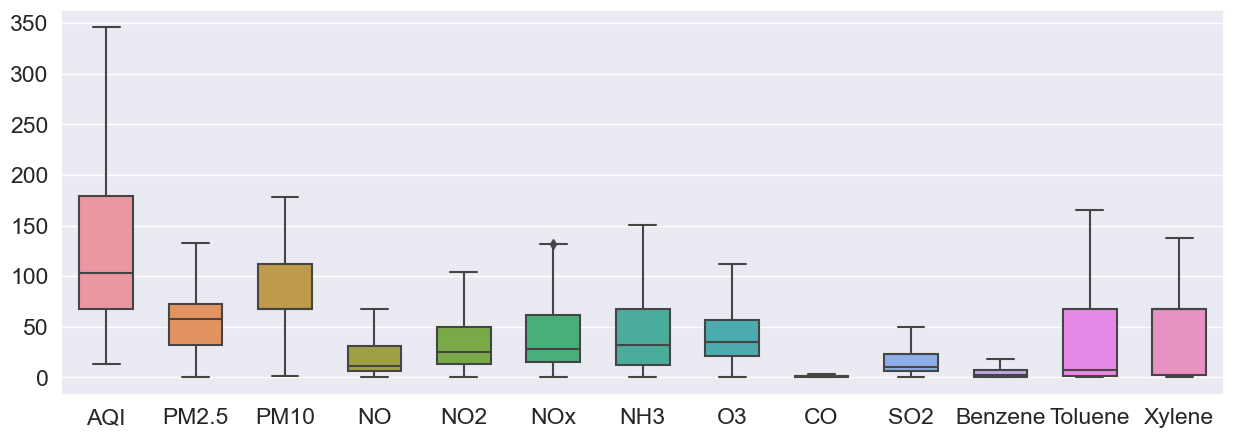

In [14]:
# Adjust the plot size
plt.figure(figsize=(15, 5))  
# Set the float columns for boxplot
sns.boxplot(data=df[[ 'AQI','PM2.5', 'PM10','NO', 'NO2', 'NOx','NH3','O3', 'CO', 'SO2','Benzene', 'Toluene', 'Xylene']],width=0.6)
# Display
plt.show()

In [15]:
# Convert the Date column of object field to Date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
# Sort the data by date
df_city_day = df.sort_values(by = 'Date')
# e first 5 row
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,6,2015-01-01,67.450578,67.450578,0.92,18.22,17.15,67.450578,0.92,27.64,57.12,0.00,0.02,0.00,67.450578,2
1,6,2015-01-02,67.450578,67.450578,0.97,15.69,16.46,67.450578,0.97,24.55,34.06,3.68,5.50,3.77,67.450578,2
2,6,2015-01-03,67.450578,67.450578,17.40,19.30,29.70,67.450578,1.71,29.07,30.70,6.80,16.40,2.25,67.450578,2
3,6,2015-01-04,67.450578,67.450578,1.70,18.48,17.97,67.450578,1.70,18.59,36.08,4.43,10.14,1.00,67.450578,2
4,6,2015-01-05,67.450578,67.450578,22.10,21.42,37.76,67.450578,1.71,39.33,39.31,7.01,18.89,2.78,67.450578,2


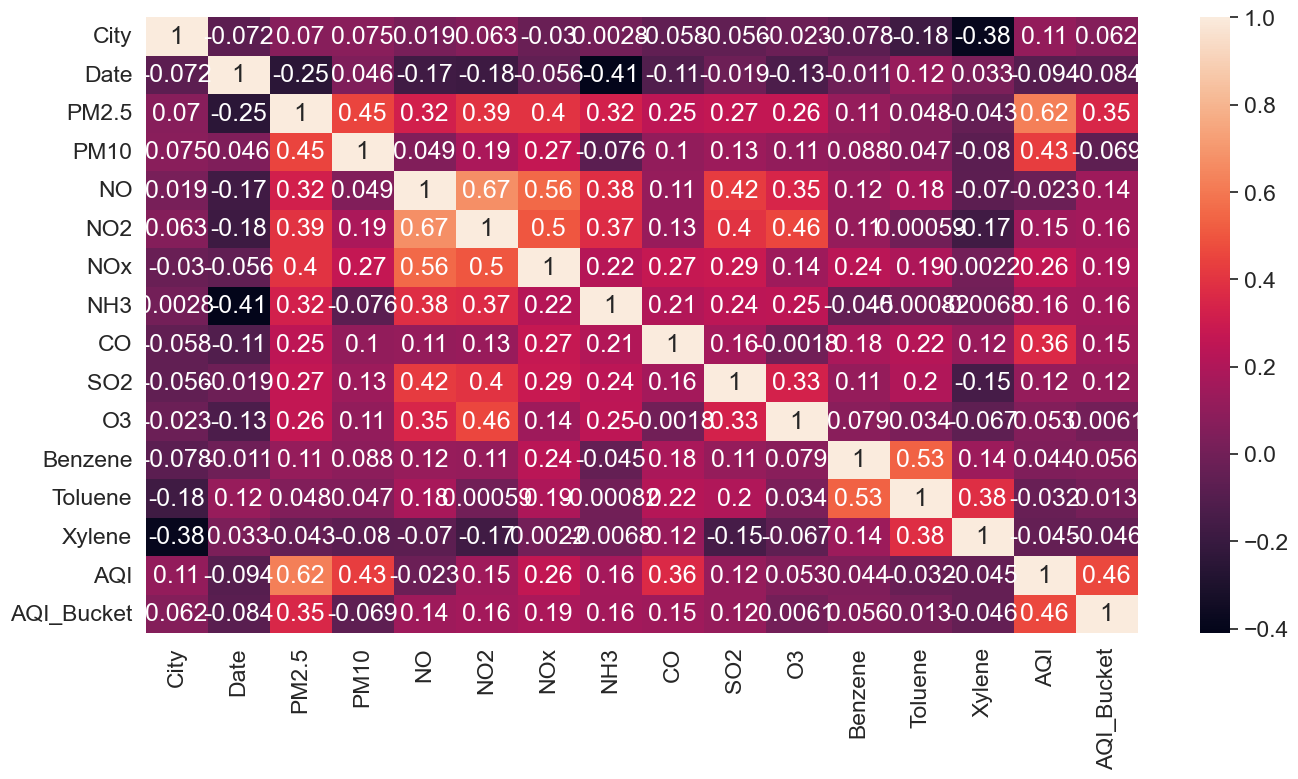

In [16]:
# Let's create a new heatmap for the new data for all numerical values correlation 
plt.figure(figsize=(16, 8)) 
sns.heatmap(df.corr(),annot=True) 
plt.show() 

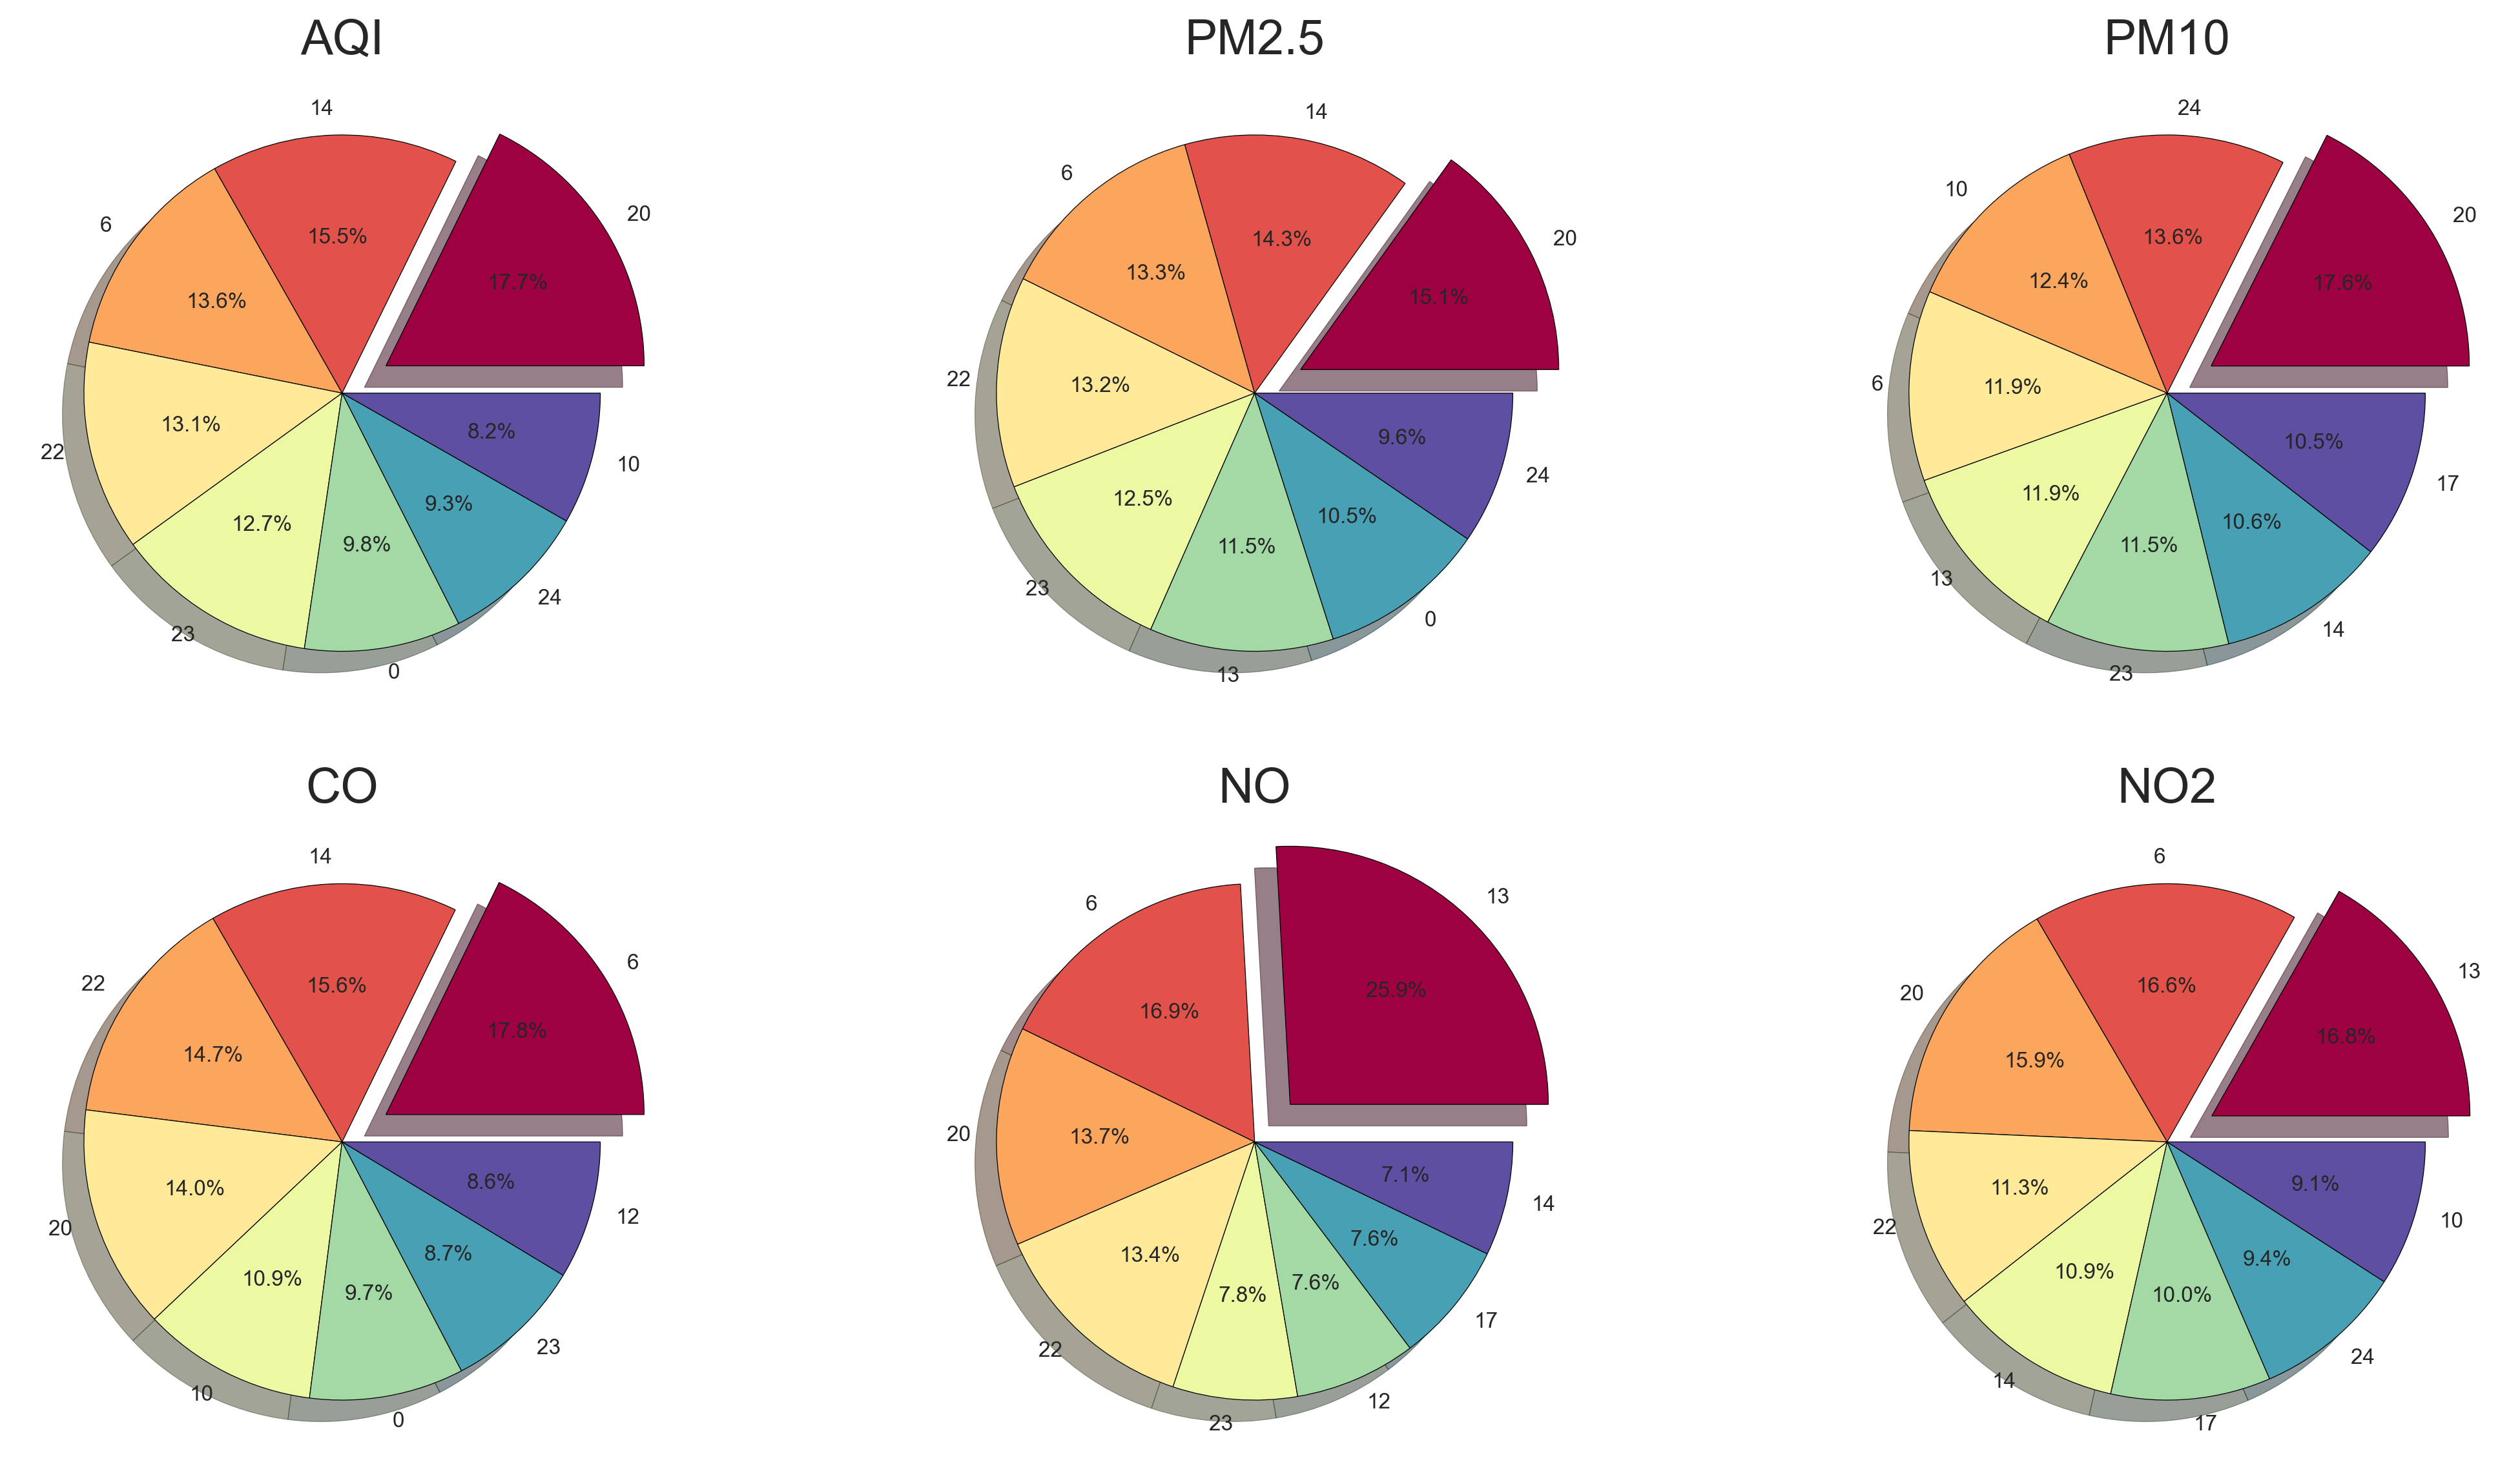

In [17]:
# For Ilustration use the original data and for 
# most effective gases for AQI
cols = ['AQI', 'PM2.5', 'PM10', 'CO', 'NO', 'NO2']

# create a pie chart
cmap = plt.get_cmap('Spectral')
color = [cmap(i) for i in np.linspace(0, 1, 8)]
explode = [0.2, 0, 0, 0, 0, 0, 0, 0]

# fit multiple charts in the display
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), dpi=300)

axes = axes.flatten()

# loop around all gasses for each city
for ax, col in zip(axes, cols):
    # Group the cities and select the 8 cities with the highest total
    x = df_city_day.groupby('City')[col].sum().sort_values(ascending=False)
    x = x.reset_index('City')
    
    top_cities = x[:8]
    sizes = top_cities[col].values 
    labels = top_cities['City'].tolist()  
    
    # set the pie chart
    wedges, texts, autotexts = ax.pie(sizes, shadow=True, autopct='%1.1f%%', 
                                      colors=color, explode=explode,
                                      wedgeprops={'edgecolor': 'black', 'linewidth': 0.3},
                                      labels=labels)

    for text in texts:
        text.set_fontsize(8)  
    
    for autotext in autotexts:
        autotext.set_fontsize(8) 
    
    ax.set_title(f'{col}') 

for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [19]:
df_full = df.copy()

In [20]:
# We assigned the names of the numeric columns in df_city_day as a list to numeric_cols.
numeric_cols = df_full.select_dtypes(include=np.number).columns.tolist() 
numeric_cols

['City',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI',
 'AQI_Bucket']

In [21]:
categorical_cols = df_full.select_dtypes(include=['object']).columns.tolist() # df_city_day'deki kategorik sütunların isimlerini bir liste olarak categorical_cols'a atadık.
categorical_cols

[]

In [22]:
full_columns=df_full.columns
full_columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [23]:
# We assigned to input_cols from full_columns, excluding the last column from index 0 and 2.
input_cols = [full_columns[0]]+list(full_columns[2:-2])+ [full_columns[-1]] 
# We set the target column as AQI.
target_col = 'AQI'

In [24]:
from sklearn.model_selection import train_test_split
train_and_val_df, test_df = train_test_split(df_full, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(df_full, test_size=0.2) 
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (23624, 16)
val_df.shape : (5907, 16)
test_df.shape : (5907, 16)


In [25]:
train_inputs = train_df[input_cols].copy()# We copied the input_cols columns from the train_df DataFrame and assigned them to train_inputs
train_target = train_df[target_col].copy() # We copied the target_col columns from the train_df DataFrame and assigned them to train_target
val_inputs = val_df[input_cols].copy() 
val_target = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy() 

In [26]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist() 

In [27]:
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer(strategy = 'mean') # We created an imputer object and specified that it fills empty values ​​with the average.
imputer.fit(df_full[numeric_cols]) # df_full trains the imputer using the numeric columns in the DataFrame and calculates the mean values ​​for each column.

SimpleImputer()

In [28]:
# The transform method transforms the missing values ​​in the training, test and validation sets using the mean values ​​learned with fit.
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [29]:
train_inputs[numeric_cols].isna().sum() 

City          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI_Bucket    0
dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_inputs[numeric_cols])# We created a scaler object and fit it with training data.
# Numerical columns in training, test and validation sets are standardized.
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [31]:
from sklearn.preprocessing import OneHotEncoder
# We created an encoder object. By default, sparse_output = True and the results are returned in a sparse format. If False is selected, a NumPy array is returned. handle_unknown = 'ignore' If unknown categories are encountered, no error is given and all zero values ​​are assigned for these categories.
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore') 
encoder.fit(df_full[categorical_cols])# We trained the encoder using the categorical columns in the df_full

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [32]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols)) 
encoded_cols

[]

In [33]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols]) 
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [34]:
train_inputs.head(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
6004,-0.446252,-1.289336,-1.087055,-0.651531,-0.712889,-0.626495,-1.098671,-0.380110,-0.787040,-1.013114,-0.770062,-0.787641,0.784728,-0.435421
26245,-0.177526,-1.627691,-1.623381,-0.283926,-1.262653,-0.745131,-0.658862,1.811411,1.064817,-0.817607,-0.960669,-0.844755,0.784728,-0.953287


In [35]:
test_inputs.head(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
22593,-0.043163,0.486579,-0.417161,2.183293,1.557442,1.185884,1.073528,-1.53431,1.064817,1.313899,1.262057,1.489991,0.784728,0.082446
22459,-0.043163,0.486579,-0.417161,2.183293,1.557442,1.185884,1.073528,-1.53431,1.064817,1.313899,1.262057,1.489991,0.784728,0.082446


In [36]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [37]:
# We made a prediction and filled the predictions with the average of the AQI column
def guess_mean(inputs):
    return np.full(len(inputs), df_full.AQI.mean())

In [38]:
guess_mean_train_r2_score=r2_score(guess_mean(X_train), train_target)
print("The error was calculated by assigning average values ​​to the prediction train_r2score: ", guess_mean_train_r2_score)
guess_mean_val_r2_score=r2_score(guess_mean(X_val), val_target)
print("The error was calculated by assigning average values ​​to the prediction val_r2score : ", guess_mean_val_r2_score)
guess_mean_test_r2_score=r2_score(guess_mean(X_test), test_target)
print("The error was calculated by assigning average values ​​to the prediction test_r2score: ", guess_mean_test_r2_score)

The error was calculated by assigning average values ​​to the prediction train_r2score:  -2.6231459899387235e+31
The error was calculated by assigning average values ​​to the prediction val_r2score :  -2.6200940166562156e+31
The error was calculated by assigning average values ​​to the prediction test_r2score:  -2.579237374707445e+31


In [39]:
def guess_random(inputs):
    lo, hi = df_full.AQI.min(), df_full.AQI.max()
    return np.random.random(len(inputs)) * (hi - lo) + lo

In [40]:
guess_random_train_r2_score=r2_score(guess_random(X_train), train_target)
print("The error was calculated by assigning random values ​​to the prediction train_r2_score: ", guess_random_train_r2_score)
guess_random_val_r2_score=r2_score(guess_random(X_val), val_target)
print("The error was calculated by assigning random values ​​to the prediction val_r2_score : ", guess_random_val_r2_score)
guess_random_test_r2_score=r2_score(guess_random(X_test), test_target)
print("The error was calculated by assigning random values ​​to the prediction test_r2_score : ", guess_random_test_r2_score)

The error was calculated by assigning random values ​​to the prediction train_r2_score:  -0.8887977367096154
The error was calculated by assigning random values ​​to the prediction val_r2_score :  -0.8528201843128418
The error was calculated by assigning random values ​​to the prediction test_r2_score :  -0.8774065486556906


In [41]:
results = []
#we created a dict where we create objects from different models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'XGBRegressor' : XGBRegressor(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    'SVR' :SVR(kernel='linear'),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}

In [42]:
def try_model(model,name):
    model.fit(X_train, train_target)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds=model.predict(X_test)
    
    # The R^2 score indicates how well the model predicted. A value close to 1 indicates that the model predicted perfectly.
    train_r2_score = r2_score(train_target, train_preds) 
    val_r2_score= r2_score(val_target, val_preds)
    test_r2_score = r2_score(test_target, test_preds)

    print(f"{name} Model:")
    print("Train r2_score : ", train_r2_score)
    print("Validation r2_score : ", val_r2_score)
    print("Test r2_score : ", test_r2_score)
    print("-" * 40)
    # We add the name of each model and the scores of that model to the result list.
    results.append({'Model': name, 'Train R2 Score': train_r2_score, 'Validation R2 Score': val_r2_score, 'Test R2 Score': test_r2_score}) 

In [43]:
for name, model in models.items():
    try_model(model,name)

LinearRegression Model:
Train r2_score :  0.617553574132021
Validation r2_score :  0.6136165418728253
Test r2_score :  0.6102977866483262
----------------------------------------
RandomForestRegressor Model:
Train r2_score :  0.9852985692447396
Validation r2_score :  0.8877911365079499
Test r2_score :  0.9682670950972667
----------------------------------------
XGBRegressor Model:
Train r2_score :  0.9543027576789704
Validation r2_score :  0.8803798331060867
Test r2_score :  0.9410973502142698
----------------------------------------
DecisionTreeRegressor Model:
Train r2_score :  0.9999523315388954
Validation r2_score :  0.8033102945327965
Test r2_score :  0.9623296573160095
----------------------------------------
SVR Model:
Train r2_score :  0.6030168301684093
Validation r2_score :  0.5993998265630976
Test r2_score :  0.5971977745453533
----------------------------------------
GradientBoostingRegressor Model:
Train r2_score :  0.8825632701716823
Validation r2_score :  0.8741695755185

In [44]:
results_df = pd.DataFrame(results)

In [45]:
results_df

,Model,Train R2 Score,Validation R2 Score,Test R2 Score
0,LinearRegression,0.617554,0.613617,0.610298
1,RandomForestRegressor,0.985299,0.887791,0.968267
2,XGBRegressor,0.954303,0.880380,0.941097
3,DecisionTreeRegressor,0.999952,0.803310,0.962330
4,SVR,0.603017,0.599400,0.597198
5,GradientBoostingRegressor,0.882563,0.874170,0.876365


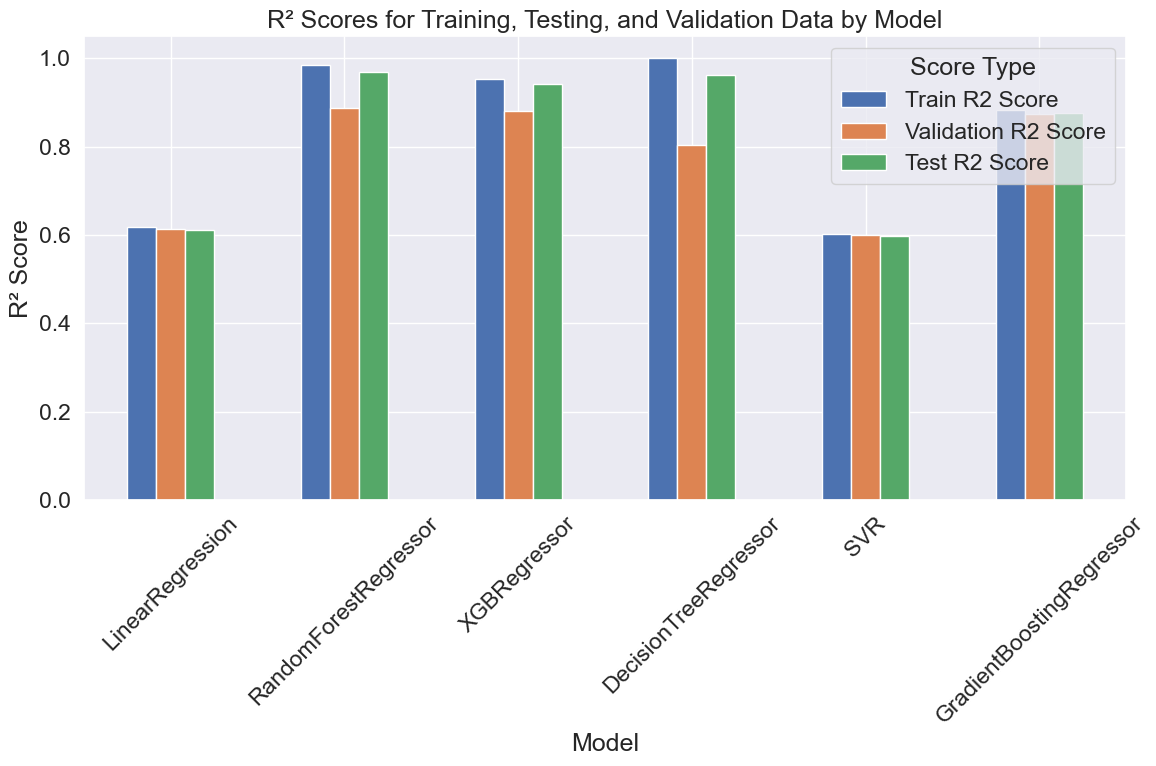

In [46]:
results_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('R² Scores for Training, Testing, and Validation Data by Model')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.legend(title='Score Type')
plt.xticks(rotation=45)
plt.tight_layout()  # Ensures that all elements (axis labels, titles, subtitles, etc.) are properly placed within the figure area.
plt.show()

In [ ]:


account_sid = ""
auth_token = ""
from_phone = ""
to_phone = ""

client = Client(account_sid, auth_token)

AQI_THRESHOLD = 50

# Identify cities with low AQI based on the threshold
low_aqi_cities = df[df['AQI'] < AQI_THRESHOLD]['City'].unique()

# Check if there are any cities with low AQI and send an alert for the first one found
if low_aqi_cities.size > 0:
    city = low_aqi_cities[0]  # Get the first city with low AQI
    aqi_value = df[df['City'] == city]['AQI'].min()  # Get the lowest AQI value for this city

    # Create and send the alert message
    message = f"Air quality alert for {city}. AQI is currently {aqi_value}. Take necessary precautions."
    client.messages.create(
        body=message,
        from_=from_phone,
        to=to_phone
    )
    print(f"Sent alert for {city} with AQI {aqi_value}")
else:
    print("No cities with low AQI detected.")

Sent alert for 6 with AQI 48.0


In [48]:
max_aqi_per_city = df.groupby('City')['AQI'].max().reset_index()

# Display the result
print(max_aqi_per_city)

    City    AQI
0      0  333.0
1      1  346.0
2      2   92.0
3      3  345.0
4      4  312.0
5      5  346.0
6      6  346.0
7      7  343.0
8      8  180.0
9      9  312.0
10    10  342.0
11    11  345.0
12    12  346.0
13    13  307.0
14    14  346.0
15    15  277.0
16    16  230.0
17    17  343.0
18    18  182.0
19    19  120.0
20    20  346.0
21    21  341.0
22    22  346.0
23    23  346.0
24    24  342.0
25    25  335.0


In [49]:
df['City'].unique()

array([ 6,  2,  9, 21, 10,  4, 11, 25,  0, 19, 20,  8, 23,  1, 24,  7,  3,
       15,  5, 14, 13, 22, 18, 12, 16, 17], dtype=int64)